C:\Users\user\AppData\Local\Temp\ipykernel_19488\2517526478.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


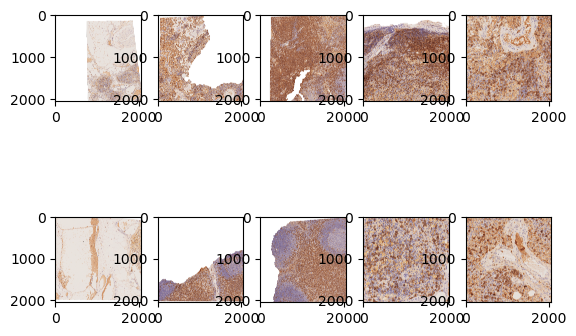

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

fig,ax = plt.subplots(2,5)

filenames=['data/membrane/test_data/{}.png'.format(i) for i in range(10)] #or glob or any other way to describe filenames
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()

In [20]:
# import the necessary packages
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2

index = {}
images = {}
for imagePath in glob.glob('data/membrane/td' + "/*.png"):
    # extract the image filename (assumed to be unique) and
    # load the image, updating the images dictionary
    filename = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(imagePath)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
    [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    index[filename] = hist

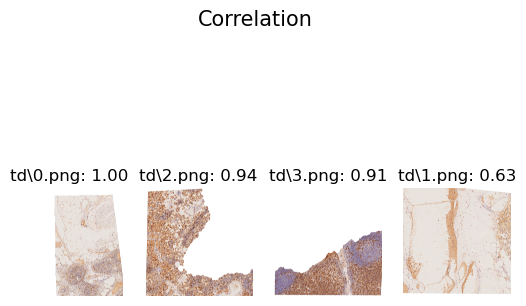

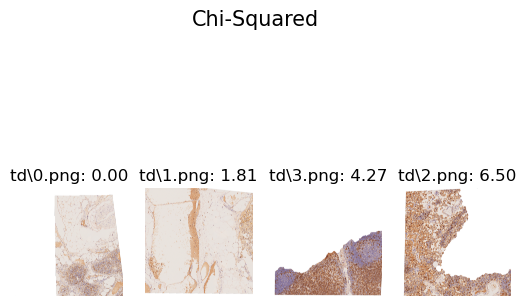

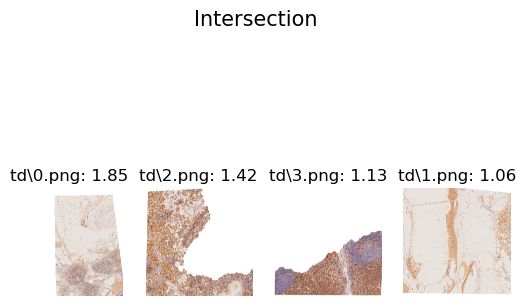

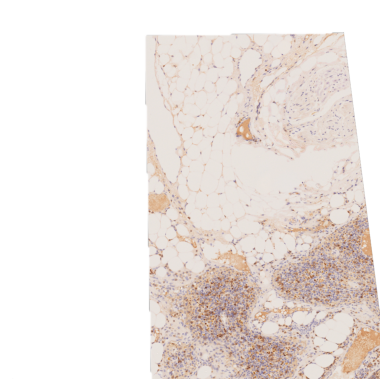

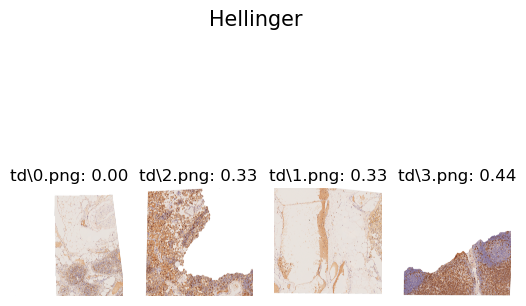

In [21]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
    # initialize the results dictionary and the sort
    # direction
    results = {}
    reverse = False
    
    # if we are using the correlation or intersection
    # method, then sort the results in reverse order
    if methodName in ("Correlation", "Intersection"):
        reverse = True
        
#     print(index)

        
    # loop over the index
    for (k, hist) in index.items():
        # compute the distance between the two histograms
        # using the method and update the results dictionary
        d = cv2.compareHist(index["td\\0.png"], hist, method)
        results[k] = d
        
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
    
    # show the query image
    fig = plt.figure("Query")
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images["td\\0.png"])
    plt.axis("off")
    # initialize the results figure
    fig = plt.figure("Results: %s" % (methodName))
    fig.suptitle(methodName, fontsize = 15)
    # loop over the results
    for (i, (v, k)) in enumerate(results):
        # show the result
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%s: %.2f" % (k, v))
        plt.imshow(images[k])
        plt.axis("off")
# show the OpenCV methods
plt.show()